In [29]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda,ConvLSTM2D,LSTM,Reshape
from keras import backend as K
from tensorflow.keras.layers import MaxPooling3D,Conv3D,Conv3DTranspose

In [30]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [31]:
import tensorflow as tf

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
SIZE = 512

In [34]:
path=['/content/drive/MyDrive/areas_rgb/abukebir/Pair1',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair2',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair3',
 '/content/drive/MyDrive/areas_rgb/abukebir/Pair4',
  '/content/drive/MyDrive/areas_rgb/annubariyah/Pair1',
 '/content/drive/MyDrive/areas_rgb/annubariyah/Pair2',
 '/content/drive/MyDrive/areas_rgb/annubariyah/Pair3',
 '/content/drive/MyDrive/areas_rgb/banha/Pair1',
 '/content/drive/MyDrive/areas_rgb/banha/Pair2',
 '/content/drive/MyDrive/areas_rgb/banha/Pair3',
 '/content/drive/MyDrive/areas_rgb/banha/Pair4',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair1',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair2',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair3',
 '/content/drive/MyDrive/areas_rgb/beheira_etay/Pair4',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair1',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair2',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair3',
 '/content/drive/MyDrive/areas_rgb/beheria_qarya/Pair4',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair1',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair2',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair3',
 '/content/drive/MyDrive/areas_rgb/bishla/Pair4',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair1',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair2',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair3',
 '/content/drive/MyDrive/areas_rgb/biyla/Pair4',
  '/content/drive/MyDrive/areas_rgb/blbes/Pair1',
 '/content/drive/MyDrive/areas_rgb/blbes/Pair2',
 '/content/drive/MyDrive/areas_rgb/blbes/Pair3',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair1',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair2',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair3',
 '/content/drive/MyDrive/areas_rgb/damanhour/Pair4',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair1',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair2',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair3',
 '/content/drive/MyDrive/areas_rgb/damietta/Pair4',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair1',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair2',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair3',
 '/content/drive/MyDrive/areas_rgb/elkasasin/Pair4',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair1',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair2',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair3',
 '/content/drive/MyDrive/areas_rgb/fayoum/Pair4',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair1',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair2',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair3',
 '/content/drive/MyDrive/areas_rgb/gamaleya/Pair4',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair1',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair2',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair3',
 '/content/drive/MyDrive/areas_rgb/geiza/Pair4',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair1',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair2',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair3',
 '/content/drive/MyDrive/areas_rgb/housh_eissa/Pair4',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair1',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair2',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair3',
 '/content/drive/MyDrive/areas_rgb/kafr_eldawar/Pair4',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair1',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair2',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair3',
 '/content/drive/MyDrive/areas_rgb/kafr_elsheikh/Pair4',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair1',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair2',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair3',
 '/content/drive/MyDrive/areas_rgb/mansoura/Pair4',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair1',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair2',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair3',
 '/content/drive/MyDrive/areas_rgb/mutubas/Pair4',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair1',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair2',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair3',
 '/content/drive/MyDrive/areas_rgb/north_cairo/Pair4',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair1',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair2',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair3',
 '/content/drive/MyDrive/areas_rgb/portsaid/Pair4',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair1',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair2',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair3',
 '/content/drive/MyDrive/areas_rgb/sadat_city/Pair4',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair1',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair2',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair3',
 '/content/drive/MyDrive/areas_rgb/sharqia/Pair4',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair1',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair2',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair3',
 '/content/drive/MyDrive/areas_rgb/tanta/Pair4']

labels=[
 '/content/drive/MyDrive/Labels/abukebir',
   '/content/drive/MyDrive/Labels/annubariyah',
 '/content/drive/MyDrive/Labels/banha',
 '/content/drive/MyDrive/Labels/beheira_etay',
 '/content/drive/MyDrive/Labels/beheria_qarya',
 '/content/drive/MyDrive/Labels/bishla',
 '/content/drive/MyDrive/Labels/biyla',
  '/content/drive/MyDrive/Labels/blbes',
 '/content/drive/MyDrive/Labels/damanhour',
 '/content/drive/MyDrive/Labels/damietta',
 '/content/drive/MyDrive/Labels/elkasasin',
 '/content/drive/MyDrive/Labels/fayoum',
 '/content/drive/MyDrive/Labels/gamaleya',
 '/content/drive/MyDrive/Labels/geiza',
 '/content/drive/MyDrive/Labels/housh_eissa',
 '/content/drive/MyDrive/Labels/kafr_eldawar',
 '/content/drive/MyDrive/Labels/kafr_elsheikh',
 '/content/drive/MyDrive/Labels/mansoura',
 '/content/drive/MyDrive/Labels/mutubas',
 '/content/drive/MyDrive/Labels/north_cairo',
 '/content/drive/MyDrive/Labels/portsaid',
 '/content/drive/MyDrive/Labels/sadat_city',
 '/content/drive/MyDrive/Labels/sharqia',
 '/content/drive/MyDrive/Labels/tanta']

In [35]:
def load_data():
  dataset={}
  #im=[]
  #cmap=[]
  for i in range(len(labels)):
    city=labels[i].split('/')[-1]
    for x in sorted(os.listdir('/content/drive/MyDrive/areas_rgb/'+city+'/')):
      pairs=sorted(os.listdir('/content/drive/MyDrive/areas_rgb/'+city+'/'))
      im=['/content/drive/MyDrive/areas_rgb/'+city+'/' + p for p in pairs]
      cmap= ['/content/drive/MyDrive/Labels/'+city+'/'+x for x in sorted(os.listdir('/content/drive/MyDrive/Labels/'+city))]
      images=[]
      for y in range(len(im)):
        images=[im[y]+'/'+x for x in sorted(os.listdir(im[y]))]
        dataset[city+str(y+1)]={'images':images, 'label': cmap[y]+ '/'+  os.listdir(cmap[y])[0]}
  return dataset  
ds=load_data()

In [36]:
ds['mansoura1']['images'][0]

'/content/drive/MyDrive/areas_rgb/mansoura/Pair1/1984.png'

In [37]:
p1=[];y=[];p2=[]
for i in ds.keys():
  image1=cv2.imread(ds[i]['images'][0])
  image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
  #image1=Image.fromarray(image1)
  #image1=image1.resize((SIZE,SIZE))
  image1=cv2.resize(image1,(SIZE,SIZE),interpolation=cv2.INTER_AREA)
  image2=cv2.imread(ds[i]['images'][1])
  image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
  #image2=Image.fromarray(image2)
  #image2=image2.resize((SIZE,SIZE))
  image2=cv2.resize(image2,(SIZE,SIZE),interpolation=cv2.INTER_AREA)
  image3=cv2.imread(ds[i]['label'],0)
  _,image3=cv2.threshold(image3,0,255,cv2.THRESH_TOZERO)
  #image3=Image.fromarray(image3)
  #image3=image3.resize((SIZE,SIZE))
  image3=cv2.resize(image3,(SIZE,SIZE),interpolation=cv2.INTER_AREA)
  p1.append(image1/255.0)
  p2.append(image2/255.0)
  y.append(image3/255.0)

In [38]:
p1=np.array(p1)
p2=np.array(p2)
y=np.expand_dims(np.array(y),3)

In [39]:
p1.shape

(94, 512, 512, 3)

In [40]:
im=np.concatenate((p1,p2),axis=3)

In [41]:
del p1,p2

In [42]:
smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [43]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [44]:
def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(im, y, test_size = 0.2, random_state = 0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0,shuffle=True)

In [46]:
def simple_unet_model():
#Build the model
    inputs1 =Input((512,512,6))
    #inputs2=Input((512,512,3))
    s = inputs1
    #s=concatenate([inputs1,inputs2],axis=1)
    print(s.shape)
    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2),padding='same')(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2),padding='same')(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2),padding='same')(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2),padding='same')(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    #outputs=[]
    #print(type(outputs))
    #for i in range(2):
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9) 
   # op1=  Dense(1)(c9)
   # op2 = Dense(1)(c9)
    model = Model(inputs=inputs1, outputs=[outputs])
    model.compile(optimizer='Nadam', loss=jacard_coef_loss,metrics=['accuracy',dice_coef,jacard_coef])
    model.summary()
    return model

In [47]:
model=simple_unet_model()

(None, 512, 512, 6)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 6) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 512, 512, 16) 880         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 512, 512, 16) 0           conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 512, 512, 16) 2320        dropout_9[0][0]                  
________________________________________________________________________

In [48]:
del ds

In [ ]:
history = model.fit(X_train,y_train, batch_size=16,verbose=2, epochs=400,validation_data=(X_val,y_val))

In [51]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 90ms/step - loss: -0.4618 - accuracy: 0.8512 - dice_coef: 0.6318 - jacard_coef: 0.4618


[-0.4618242681026459,
 0.8512287139892578,
 0.6318456530570984,
 0.4618242681026459]

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'dice_coef', 'jacard_coef', 'val_loss', 'val_accuracy', 'val_dice_coef', 'val_jacard_coef'])

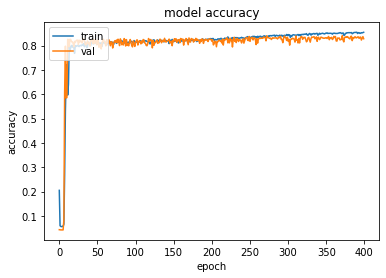

<Figure size 432x288 with 0 Axes>

In [59]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("accuracy.png")

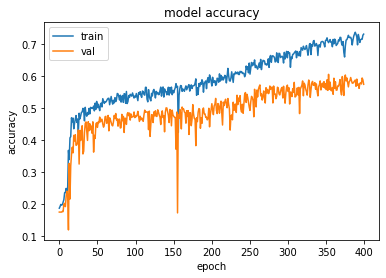

<Figure size 432x288 with 0 Axes>

In [60]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("dice_coef.png")

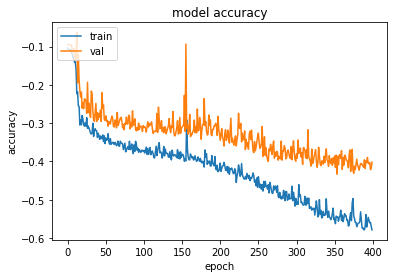

<Figure size 432x288 with 0 Axes>

In [61]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("loss.png")

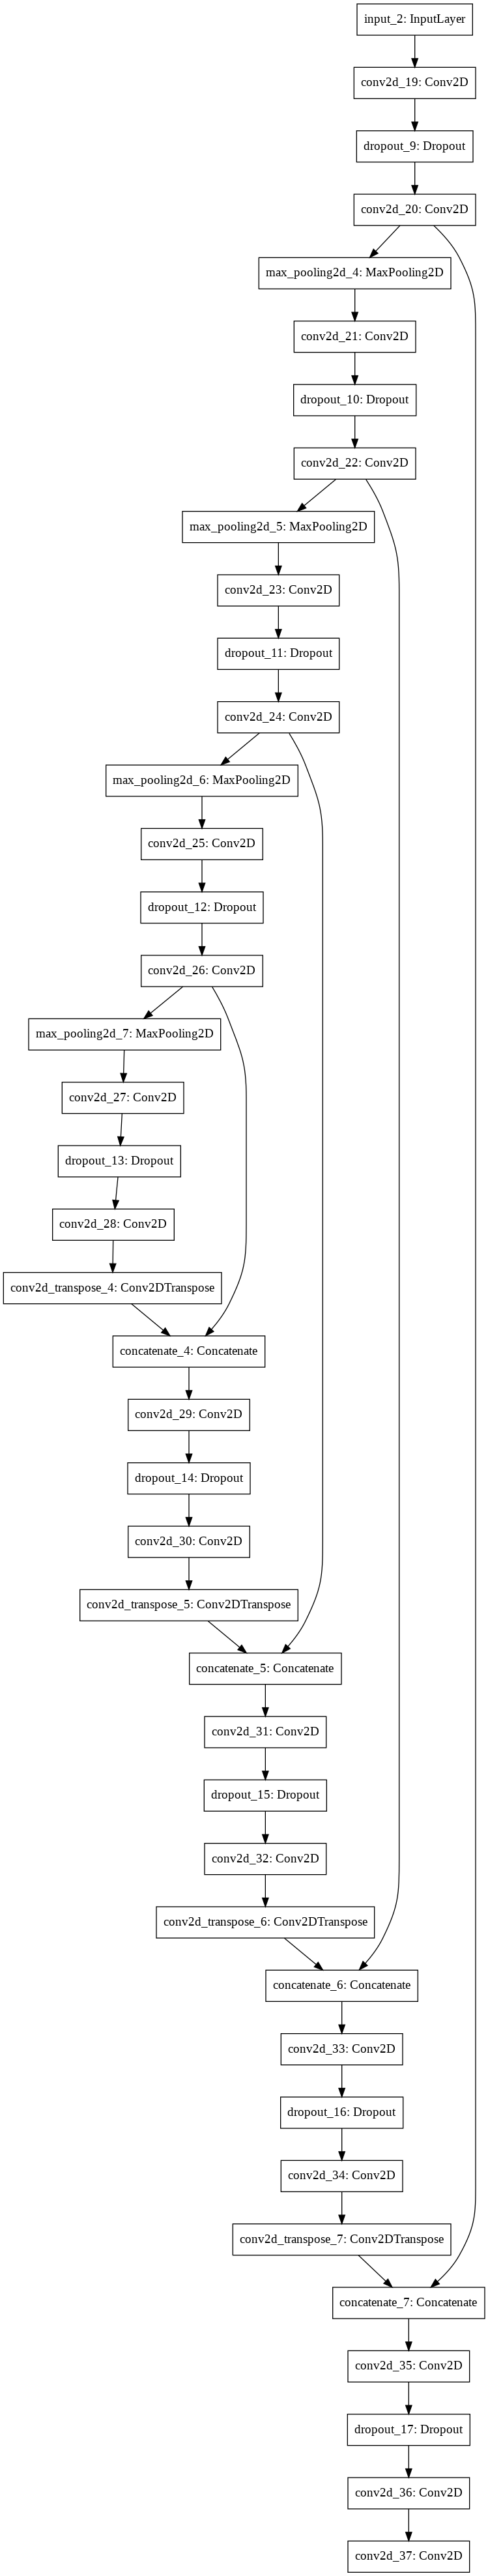

In [62]:
from keras.utils import plot_model
plot_model(model,to_file="standardunet.png")

In [63]:
model.save('standard_unet.h5')